# Nested Sigmoid Relationships

Alignment strength determined by a sigmoid along Log(M*) (related to Luminosity)

y_high on that sigmoid is determined by a color sigmoid. x-axis is color index, y-axis is the value that will be used for y_high in the m* sigmoid

the color simoid will rely on a redshift sigmoid. Unsure which parameters/how yet. We'll see

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import lines

%matplotlib inline

## Functions

In [15]:
# Really all the same function
# redshift_sigmoid affects the y_max of color_sigmoid
# color_sigmoid affects the y_max of stellar_mass_sigmoid

def sigmoid(x, x0=0, k=1, y_low=-1, y_high=1):
    return y_low + ( y_high - y_low ) / ( 1 + np.exp( -k * (x - x0) ) )

def redshift_sigmoid(x=0, x0=0, k=1, y_low=-1, y_high=1):
    return y_low + ( y_high - y_low ) / ( 1 + np.exp( -k * (x - x0) ) )

def color_sigmoid(x=0, x0=0, k=1, y_low=0, y_high=redshift_sigmoid, params={}):
    return y_low + ( y_high(**params) - y_low ) / ( 1 + np.exp( -k * (x - x0) ) )

def stellar_mass_sigmoid(x, x0=0.5, k=1, y_low=0, y_high=color_sigmoid, params={}):
    return y_low + ( y_high(**params) - y_low ) / ( 1 + np.exp( -k * (x - x0) ) )

## Test the Shapes

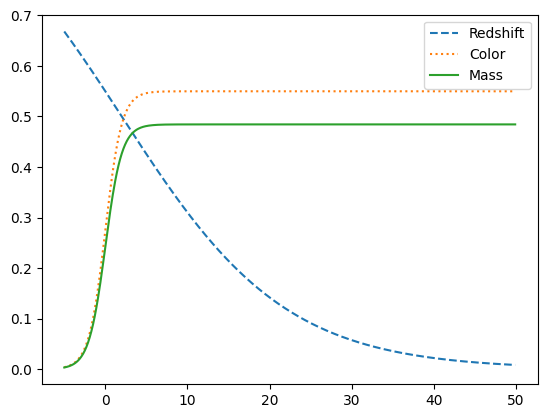

In [113]:
x = np.arange(-5, 50, 0.1)
redshift_params = {"x0":2, "k":-.1, "y_low":0, "y_high":1}
color_params = {"x0":0, "k":1, "y_low":0, "y_high":redshift_sigmoid, "params":{**redshift_params, "x":0}}
mass_params = {"x0":0, "k":1, "y_low":0, "y_high":color_sigmoid, "params":{**color_params, "x":2}}

#plt.plot( x, sigmoid(x) , label="Blank")
plt.plot( x, redshift_sigmoid(x, **redshift_params), "--", label="Redshift")
plt.plot( x, color_sigmoid(x,**color_params), ":", label="Color" )
plt.plot( x, stellar_mass_sigmoid(x, **mass_params), label="Mass" )

plt.legend()

## Adjust Parameters to Realistic Ranges

### Redshift

In [122]:
redshift_params = {"x0":2, "k":-1, "y_low":0, "y_high":1}

(-4.0, 10.0)

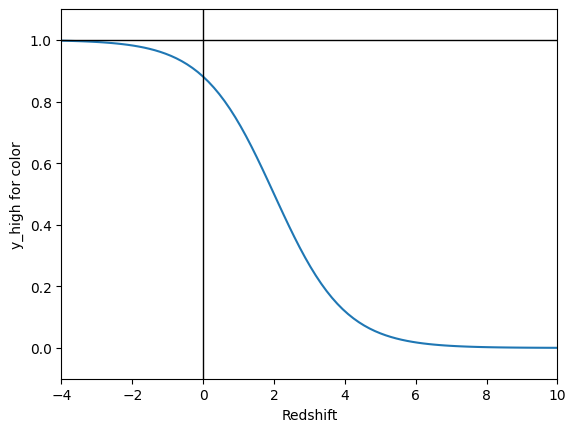

In [123]:
z = np.linspace(-5,10,100)

plt.plot( z, redshift_sigmoid(z, **redshift_params) )
plt.axhline(y=1, xmin=-5, xmax = 5, linewidth=1, color='k')
plt.axvline(x=0, ymin=-0.1, ymax = 1.1, linewidth=1, color='k')

plt.xlabel("Redshift")
plt.ylabel("y_high for color")

plt.ylim([-0.1,1.1])
plt.xlim([-4, 10])

### Color

In [27]:
# Test at redshift 0
color_params = {"x0":0, "k":0.6, "y_low":0, "y_high":redshift_sigmoid, "params":{**redshift_params, "x":0}}

(-4.0, 10.0)

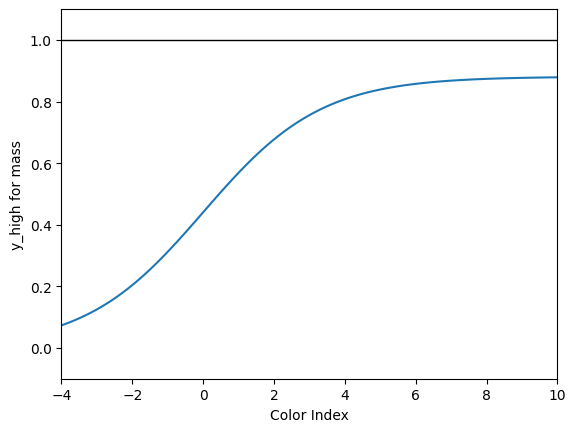

In [28]:
color_x = np.linspace(-5,10,100)

plt.plot( color_x, color_sigmoid( color_x, **color_params ) )
plt.axhline(y=1, xmin=-5, xmax = 5, linewidth=1, color='k')

plt.xlabel("Color Index")
plt.ylabel("y_high for mass")

plt.ylim([-0.1,1.1])
plt.xlim([-4, 10])

### Mass

In [29]:
# Test at redshift 0
# Test at color 2
mass_params = {"x0":12, "k":1, "y_low":0, "y_high":color_sigmoid, "params":{**color_params, "x":2}}

(8.0, 15.0)

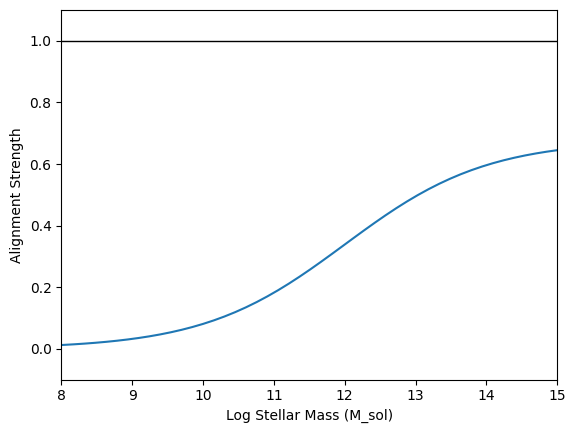

In [30]:
logM = np.log10( np.logspace( 0, 15, 100 ) )

plt.plot( logM, stellar_mass_sigmoid( logM, **mass_params ) )
plt.axhline(y=1, xmin=-5, xmax = 5, linewidth=1, color='k')

plt.xlabel("Log Stellar Mass (M_sol)")
plt.ylabel("Alignment Strength")

plt.ylim([-0.1,1.1])
plt.xlim([8, 15])

## Multi-Panel Plot

In [128]:
base_redshift_params = {"x0":2, "k":-1, "y_low":0, "y_high":1}
base_color_params = {"x0":0, "k":0.6, "y_low":0, "y_high":redshift_sigmoid}
base_mass_params = {"x0":12, "k":1, "y_low":0, "y_high":color_sigmoid}

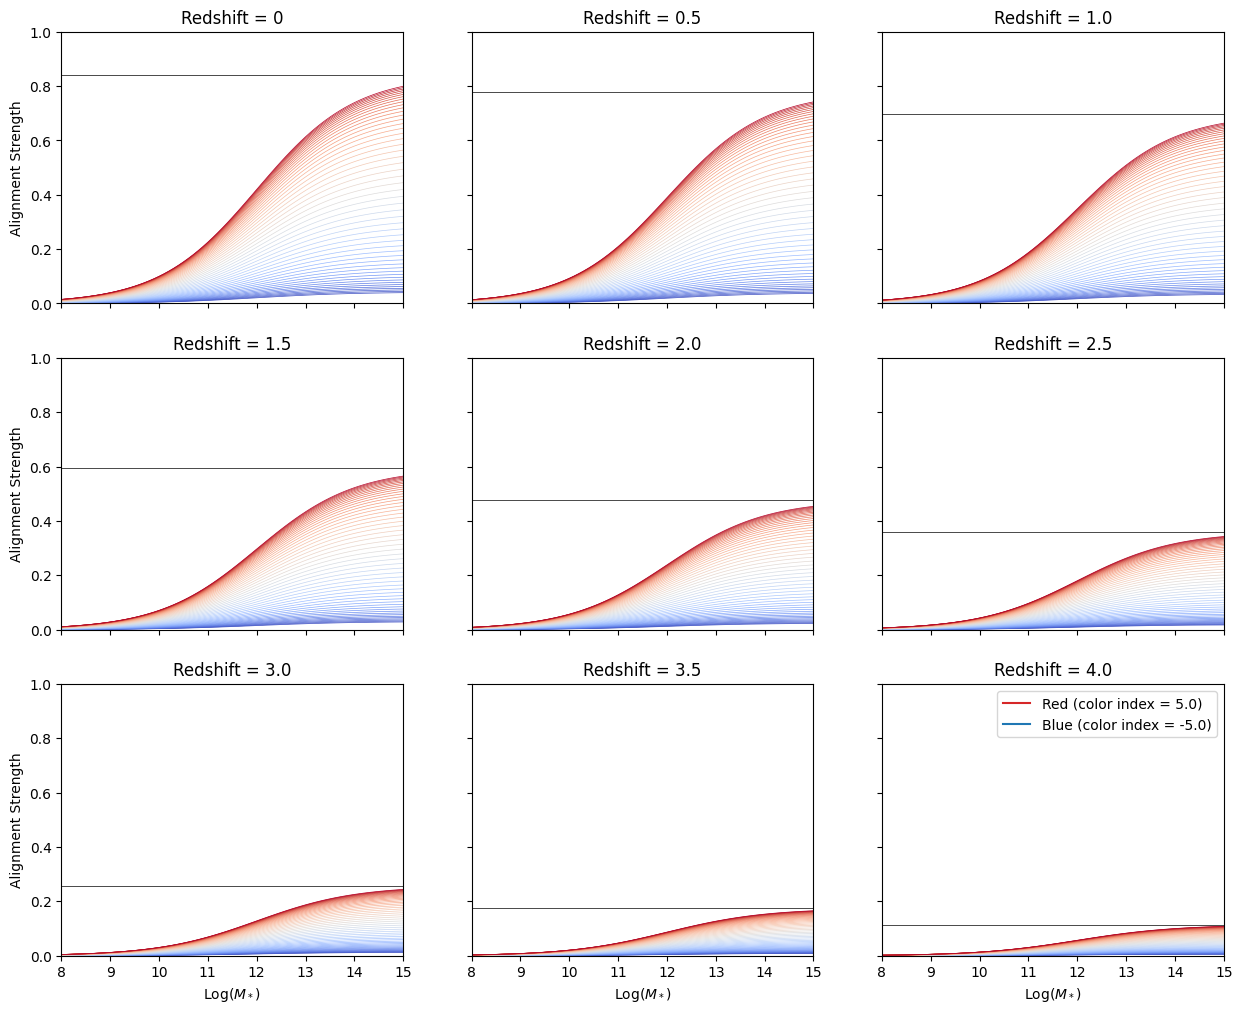

In [131]:
min_m = 8
max_m = 15

mred = u'#d62728' 
mgreen = u'#2ca02c'
mblue = u'#1f77b4'

redshifts = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
color_indices = np.arange(-5, 5.2, 0.2)
logM = np.arange(min_m-1, max_m+1, 0.1)

# Color lines appropriately
colors=cm.coolwarm(np.linspace(0,1,len(color_indices))) # blue first

red_line=lines.Line2D([],[],ls='-',c=mred,label="Red (color index = {})".format(max(color_indices).round(1)) )
blue_line=lines.Line2D([],[],ls='-',c=mblue,label="Blue (color index = {})".format(min(color_indices).round(1)) )

fig, axes = plt.subplots(3, 3, figsize=(15,12), sharex=True, sharey=True)

# Loop through each redshift
# Each redshift gets its own subplot
for i, ax in enumerate( axes.flatten() ):
    # Set up the parameters common for this redshift value
    redshift = redshifts[i]
    new_color_params = { **base_color_params, "params":{**base_redshift_params, "x":redshift} }
    
    # Prepare plot labels
    ax.set_title("Redshift = {}".format(redshift))
    if i % len(axes) == 0:
        ax.set_ylabel("Alignment Strength")
    if i >= len(axes.flatten()) - len(axes):
        ax.set_xlabel("Log($M_*$)")
    
    # Loop through each color
    # Each redshift plot will show multiple color indices
    for j, color_index in enumerate(color_indices):
        new_mass_params = { **base_mass_params, "params":{**new_color_params, "x":color_index} }
        ax.plot( logM, stellar_mass_sigmoid( logM, **new_mass_params ), lw=0.5, color=colors[j] )
    
    # Draw a black horizontal line at the maximum possible alignment value for the reddest (most aligned) galaxies
    asymptote = stellar_mass_sigmoid( np.inf, **new_mass_params )
    ax.axhline(y=asymptote, xmin=0, xmax=max_m+1, linewidth=0.5, color='k')
    
# Set the color legend
axes[-1,-1].legend(handles=[red_line, blue_line])

plt.xlim([min_m, max_m])
plt.ylim([0,1])

plt.show()